# Práctica 1: INTRODUCCIÓN A LOS DATOS


In [1]:
import json
import pandas as pd
import folium
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pyproj as proj
import warnings


## Ejercicio 1

**Muestra un ejemplo de datos estructurados, otro de datos semi-estructurados, y otro de datos no-estructurados y justifica por qué los has clasificado así. 
Los ejemplos deben ser extraídos de la página web del catálogo de datos abiertos de Valencia** (https://portaldadesobertes.gva.es/es).


NOTA: No es necesario que se compartan los datasets junto con la entrega de la PAC, es suficiente con referenciarlos, hacer una captura del dataset o copiar algunas instancias del dataset. 
Lo más importante es que quede referenciado el dataset y justificado por qué se ha clasificado como estructurado, semi-estructurado o no-estructurados.



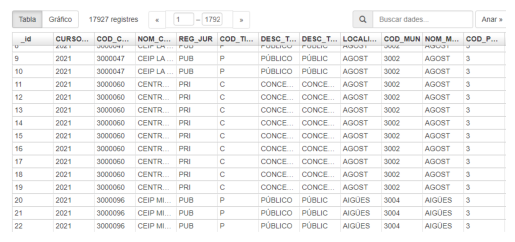

In [2]:
# Estructurado (https://dadesobertes.gva.es/es/dataset/edu-alu-gen-2021/resource/0467aa69-18f7-4bb1-8d8d-7df4293294cd)

img = mpimg.imread(r'.\estructurado.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()


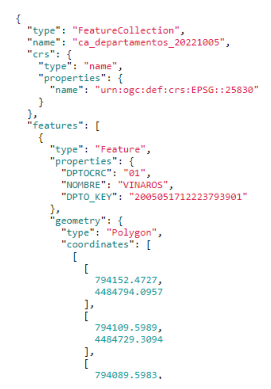

In [3]:
# Semiestructurado (https://dadesobertes.gva.es/es/dataset/edu-alu-gen-2021/resource/0467aa69-18f7-4bb1-8d8d-7df4293294cd)

img = mpimg.imread(r'.\semiestructurado.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()


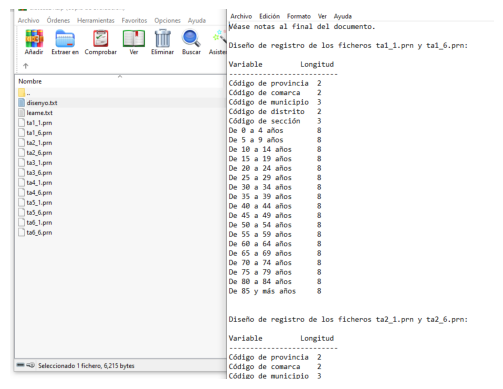

In [4]:
# Desestructurado (https://dadesobertes.gva.es/es/dataset/padro-municipal-continu-explotacio-estadistica-per-districtes-i-seccions-2021-v3)

img = mpimg.imread(r'.\desestructurado.PNG')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()


## Ejercicio 2

El formato JSON (JavaScript Object Notation) es un formato de texto sencillo para el intercambio de datos, ampliamente utilizado. En Python, la librería **json** permite abrir datos de este tipo, asignarlos a una variable y trabajar con ellos. 

La función **json.load()** permite parsear una cadena JSON y convertirla en un diccionario de Python.

De forma inversa, si tenemos un objeto python, lo podemos convertir en una cadena JSON utilizando **json.dumps()**.

Una vez cargado el JSON, éste puede ser visualizado manteniendo la identación propia del JSON para hacer más fácil su interpretación mediante la modificación de los argumentos de la función json.dumps()

_Ejemplo:_

```
import json

#ejemplo_json es una cadena json
parsed_json = json.loads(ejemplo_json)
print(json.dumps(parsed_json, indent=4, sort_keys=True))

```

Ejemplo de leer un JSON desde un archivo de texto o archivo JSON.


```
with open('nombre_archivo.txt') as archivo_json:
    parsed_json = json.load(archivo_json)

```





**En este ejercicio se va a trabajar con dos datasets en formato json: `consulados.json` y `altas_hospitalarias.json`. El primero de ellos hace referencia al listado de los consulados que se pueden encontrar en la ciudad de Barcelona. El segundo es el registro de las altas hospitalarias por causa de hospitalización y sexo.**

**Para el dataset `consulados.json`, se pide:**
- **Cargar el fichero y visualizarlo correctamente, revisando que se sigue la identación y por tanto se facilita su interpretación.**

- **¿Qué campos tiene?¿de qué tipo son?**
- **Transformar el json a un dataframe apoyándote en la librería pandas, de forma que cada campo diferente sea una columna.**

- **Guardar el dataframe generado como csv.**
- **Cargar el csv guardado en el punto anterior.**
- **Visualizar las 5 primeras filas (df.head())**
- **Obtener las dimensiones del dataframe (df.shape)**
- **¿Mantiene los mismos campos el csv generado y el json facilitado con el enunciado?**
- **¿Con qué tipo de dato asocia pandas a cada columna del dataframe? (df.types)** 

**Para el dataset `altas_hospitalarias.json`, se pide:**
- **Cargar el fichero y visualizarlo correctamente, revisando que se sigue la identación y por tanto se facilita su interpretación.**

- **¿Qué campos tiene?¿de qué tipo son?**
- **Transformar el json a un dataframe apoyándote en la librería pandas, de forma que las columnas resultantes sean 3: nombre de la causa, sexo, valor del número de altas. Para ello, deberás revisar el dataset y seleccionar los campos de interés que se quieren incluir en el dataframe. En la siguiente imagen se puede ver la forma del dataframe esperado:**

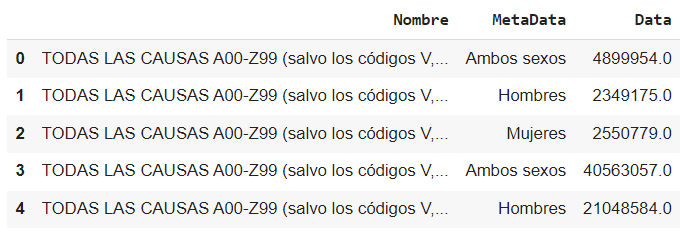

- **¿Cuántas categorías distintas puede tener la variable relativa al sexo? ¿Cuáles son? A partir del dataframe completo, obten tantos dataframes como número de categorías distintas de la variable relativa al sexo haya.** 

 - Por ejemplo si hay dos categorías, A y B, deberéis obtener dos dataframes: uno que considere todas las instancias de 'sexo' igual a A y otro dataframe que considere todas las instancias de 'sexo' igual a B.




NOTA: Se recomienda que se explore la librería json además de la librería pandas que, aunque la veremos con más detalle en el siguiente reto, en esta PAC utilizaremos las instrucciones básicas de cargar un csv en un dataframe (**pd.read_csv()**), visualizar las las primeras filas de un dataframe (**df.head()**), comprobar el tipo de dato que es cada columna del dataframe (**df.dtypes**), cambiar el tipo de dato de una columna (**df['nombre_columna'].astype(tipo_dato)**), y guardar dataframes como csv (**df.to_csv()**). 




---







---
**DATA CONSULADOS**


In [5]:
# CArgar el json y visualizarlo (considerando la identación)

json_file_path = r'./consulados.json'
with open(json_file_path, 'r') as j:
     contents = json.load(j)

dict_consulados = json.loads(contents)

print(len(dict_consulados))

print(len(dict_consulados['0']))

for element in dict_consulados['0']:
     print(type(element))


92
26
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


**¿Cuántos registros tiene? ¿Que campos tiene cada registro? ¿de qué tipo son?**

Respuesta: Tiene 92 registros. Cada uno tiene 26 registros. Son strings.

In [6]:
# Transformar el json a un dataframe apoyándote en la librería pandas.

df_consulados = pd.DataFrame(dict_consulados).T


In [7]:
# Guardar el dataframe generado como csv.

df_consulados.to_csv(r'./consulados.csv')


In [8]:
#Cargar el csv guardado en el punto anterior.

df_consulados = pd.read_csv(r'./consulados.csv')


In [9]:
# Visualizar las 5 primeras filas (df.head())

df_consulados.head()


,Unnamed: 0,register_id,name,institution_id,institution_name,created,modified,addresses_road_id,addresses_road_name,addresses_start_street_number,...,values_id,values_attribute_id,values_category,values_attribute_name,values_value,values_outstanding,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y
0,0,﻿96319101233,Consolat General de la República d'Eslovènia,NaN,NaN,35383.00000,44821.22658,28000,Via Augusta,120,...,195135,20001,Telèfons,Tel.,937273639,VERDADERO,4.287670e+16,4.583660e+15,4.140130e+15,2.147820e+16
1,1,﻿99400505899,Consolat Honorari de Belice,NaN,NaN,42884.70389,44821.37527,144601,Av Diagonal,469,...,230136,20001,Telèfons,Tel.,934303044,VERDADERO,4.286750e+15,4.582750e+15,4.139310e+15,2.146830e+15
2,2,﻿92086002925,Consolat General de Mònaco,NaN,NaN,30832.00000,44821.16143,359200,Av Pedralbes,55,...,160289,20001,Telèfons,Tel.,930107700,VERDADERO,4.259390e+14,4.582840e+16,4.139370e+14,2.114100e+16
3,3,﻿92086001095,Consolat General de Dinamarca,NaN,NaN,30832.00000,44821.15768,74506,Rbla Catalunya,45,...,160439,20001,Telèfons,Tel.,934 880 222,VERDADERO,4.301260e+15,4.582430e+14,4.139040e+15,2.164220e+16
4,4,﻿99400012127,Consolat Honorari de la República de Croàcia,NaN,NaN,37449.57642,44821.24835,349706,C Comte d'Urgell,165,...,205118,20001,Telèfons,Tel.,932720043,VERDADERO,4.290080e+15,4.582150e+15,4.138780e+16,2.150880e+16


In [10]:
# Dimensiones del dataframe

df_consulados.shape


(92, 27)

**¿Mantiene los mismos campos el csv generado y el json facilitado con el enunciado?**


*Respuesta:* SI

In [11]:
#¿Con qué tipo de dato asocia pandas a cada columna del dataframe? (df.types)

df_consulados.dtypes


Unnamed: 0                         int64
register_id                       object
name                              object
institution_id                   float64
institution_name                  object
created                          float64
modified                         float64
addresses_road_id                  int64
addresses_road_name               object
addresses_start_street_number      int64
addresses_end_street_number      float64
addresses_neighborhood_id          int64
addresses_neighborhood_name       object
addresses_district_id              int64
addresses_district_name           object
addresses_zip_code                 int64
addresses_town                    object
values_id                          int64
values_attribute_id                int64
values_category                   object
values_attribute_name             object
values_value                      object
values_outstanding                object
geo_epgs_25831_x                 float64
geo_epgs_25831_y



---

**ALTAS HOSPITALARIAS**



In [12]:
# Cargar el fichero y visualizarlo correctamente,

json_file_path = r'./altas_hospitalarias.json'
with open(json_file_path, 'r', encoding="utf8") as j:
     contents = json.load(j)

dict_altas = {'Nombre': [],
               'MetaData': [],
               'Data': []
               }

for element in contents:
     nombre = element['Nombre']
     metadata = element['MetaData'][2]['Nombre']
     data = element['Data'][0]['Valor']
     dict_altas['Nombre'].append(nombre)
     dict_altas['MetaData'].append(metadata)
     dict_altas['Data'].append(data)


**¿Cuántos registros tiene? ¿Que campos tiene cada registro? ¿de qué tipo son?**

_Respuesta:_ 
- Tiene tres registros (Nombre, MetaData y Data), con un total de 984 campos
- Nombre y MetaData son objects, mientras que Data es float64

In [13]:
# Transformar el json a un dataframe apoyándote en la librería pandas, según indicaciones

df_altas = pd.DataFrame(dict_altas)

df_altas


,Nombre,MetaData,Data
0,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V,...",Ambos sexos,4899954.0
1,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V,...",Hombres,2349175.0
2,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V,...",Mujeres,2550779.0
3,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V,...",Ambos sexos,40563057.0
4,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V,...",Hombres,21048584.0
...,...,...,...
889,"ALTAS SIN DIAGNÓSTICO, Altas hospitalarias dur...",Hombres,4204.0
890,"ALTAS SIN DIAGNÓSTICO, Altas hospitalarias dur...",Mujeres,4359.0
891,"ALTAS SIN DIAGNÓSTICO, Estancias causadas, Amb...",Ambos sexos,109834.0
892,"ALTAS SIN DIAGNÓSTICO, Estancias causadas, Hom...",Hombres,55497.0


In [14]:
# ¿Cuántas categorías distintas puede tener la variable relativa al sexo? ¿Cuáles son?

df_altas['MetaData'].value_counts()


Ambos sexos    298
Hombres        298
Mujeres        298
Name: MetaData, dtype: int64

In [15]:
# obten tantos dataframes como número de categorías distintas de la variable relativa al sexo haya

sexo_dataframes = [tabla for sexo, tabla in df_altas.groupby('MetaData')]

for dataframe in sexo_dataframes:
    dataframe.drop(columns='MetaData', inplace=True)

df_altas_ambos, df_altas_hombres, df_altas_mujeres = sexo_dataframes

df_altas_ambos


,Nombre,Data
0,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V,...",4899954.0
3,"TODAS LAS CAUSAS A00-Z99 (salvo los códigos V,...",40563057.0
6,0100 CIERTAS ENFERMEDADES INFECCIOSAS Y PARASI...,114629.0
9,0100 CIERTAS ENFERMEDADES INFECCIOSAS Y PARASI...,1173734.0
12,"0101 Enfermedades infecciosas intestinales, ex...",16850.0
...,...,...
879,2104 Otra atención médica (incluyendo sesiones...,417758.0
882,2105 Otros factores que influyen en el estado ...,72350.0
885,2105 Otros factores que influyen en el estado ...,305336.0
888,"ALTAS SIN DIAGNÓSTICO, Altas hospitalarias dur...",8563.0


## Ejercicio 3

**En este ejercicio vamos a realizar la combinación de dos ficheros csv, `merdados_.csv` y `2021_padro.csv`, mediante la creación de un único diccionario que contenga las características de cada mercado junto con las características demográficas (número de mujeres, hombres y total) que tiene el barrio donde se encuentra el mercado. 
Teniendo en cuenta esta especificación:**

-	**La columna mediante la cual se hará la asociación es 'addresses_neighborhood_name' para el dataset de los mercados y 'Nom_Barri' para el dataset del padrón.**

-	**Las claves del diccionario resultante serán los identificadores de los merdados (es decir, el campo ‘register_id’.**

-	**Ejemplo de una instancia del diccionario resultante:**





```
{'\ufeff92086009452':

  {'register_id': '\ufeff92086009452',
  'name': 'Mercat de Sant Antoni',
  'institution_id': nan,
  'institution_name': nan,
  'created': '33049',
  'modified': '44768,41858',
  ...
  'padro': {'Dones': 5688, 'Homes': 5464, 'Total': 11152}
  },
…

```



**Por tanto, los pasos a realizar en este ejercicio son:**

- **Cargar los csv y visualizar la forma y las columnas que tienen.**

- **Crear un diccionario a partir del dataframe relativo a los mercados(dict_mercados). Las claves de este diccionario debe ser el campo ‘register_id’. Los valores del diccionario serán a su vez otro diccionario donde las claves sean el resto de campos y los valores el valor que adquiere cada campo en cada mercado.**

- **Crear un diccionario a partir del dataframe relativo al padron (dict_padro). Las claves de este diccionario debe ser el campo ‘Nom_Barri’. Los valores del diccionario serán a su vez otro diccionario donde las claves sean [`Dones', 'Homes' y 'Total]` y los valores el valor calculado que adquiere cada campo.**

- **Crear un diccionario que sea la combinación de los dos anteriores (dict_completo). Este diccionario debe crearse añadiendo un campo nuevo a la información relativa a cada mercado del diccionario dict_mercados. Este nuevo campo se llamará ‘padro_barri’ y su valor será la información relativa al padrón que se corresponde con su barrio. En los casos donde no exista valor de padrón, asignar el valor  de ‘NA’.**

- **Visualizar el diccionario resultante. ¿Cuántos registros tiene? ¿Coincide este valor con el número de instancias del dataframe df_mercados?**

- **Con el diccionario resultante, responder a las siguientes preguntas accediendo a los valores del diccionario que responden a las mismas:**
 - **¿Cuántas mujeres hay en el barrio que está el mercado con register_id=92086009450**
 - **¿En qué calle esta el mercado cuyo register_id=﻿92086009457?**


- **Guardar el diccionario en un fichero con formato .json.** 


NOTA: Para la construcción del diccionario dict_completo, se recomienda que se genere un bucle donde en cada iteración se evalúe cada mercado de dict_mercados y se consulte si hay información del padron para el barrio donde está ubicado. En caso afirmativo añadir los datos indicados, en caso contrario, añadir el valor ‘NA’ al campo padro. 




In [16]:
# Cargar csv y visualitzar la forma y les columnes

df_padro = pd.read_csv('./2021_padro.csv')

df_padro.shape


(3066, 8)

In [17]:
# Crear un diccionario a partir del dataframe relativo al padron (dict_padro)

padro_df_reduced = df_padro[['Sexe', 'Nombre', 'Nom_Barri']]

padro_df_reduced.groupby(['Nom_Barri','Sexe']).sum()

dict_padro = dict()

for barri in padro_df_reduced['Nom_Barri']:
    if barri not in dict_padro.keys():
        dones = int(padro_df_reduced[(padro_df_reduced['Nom_Barri'] == barri) & (padro_df_reduced['Sexe'] == 'Dones')].sum()[1])
        homes = int(padro_df_reduced[(padro_df_reduced['Nom_Barri'] == barri) & (padro_df_reduced['Sexe'] == 'Homes')].sum()[1])
        dict_padro[barri] = {'Dones': dones, 'Homes': homes}

for barri in dict_padro:
    dict_padro[barri]['Total']=dict_padro[barri]['Dones']+dict_padro[barri]['Homes']


In [18]:
# Carregar csv mercados

df_mercados = pd.read_csv('./merdados_.csv', sep=';')


In [19]:
## Crear un diccionario a partir del dataframe relativo a los mercados(dict_mercados)

df_mercados.drop_duplicates(subset='register_id',inplace=True)
df_mercados.set_index('register_id', inplace=True)

dict_mercados = df_mercados.T.to_dict()


In [20]:
# Crear dict completo
for k,v in dict_mercados.items():
  if v['addresses_neighborhood_name'] in dict_padro.keys():
    dict_mercados[k]['padro'] = dict_padro[v['addresses_neighborhood_name']]
  else:
    dict_mercados[k]['padro']['Oficina']='NA'


In [21]:
#Visualizar el diccionario resultante. ¿Cuántos registros tiene? ¿Coincide este valor con el número de instancias del dataframe df_empleos?

len(dict_mercados) == len(df_mercados)


True

In [22]:
# Cuántas mujeres hay en el barrio que está el mercado con register_id=92086009450

dict_mercados['\ufeff92086009450']['padro']['Dones']


28118

In [23]:
# ¿En qué calle esta el mercado cuyo register_id=﻿92086009457?

dict_mercados['\ufeff92086009457']['addresses_road_name']


'Travessera de les Corts'

In [24]:
#Guardar el diccionario en un fichero con formato .json.

json_mercados = json.dumps(dict_mercados)


## Ejercicio 4

Existen diferentes repositorios o páginas web que permiten el acceso a múltiples datasets con finalidades academicas o de consulta ciudadana. Posibles fuentes abiertas de información podrían ser las siguientes:

- OpenData de ayuntamientos: Valencia, Madrid, Santander…
- https://archive.ics.uci.edu/ml/datasets.php
- https://www.kaggle.com/datasets
- https://bigml.com/gallery/datasets
- https://toolbox.google.com/datasetsearch

**En esta actividad se pide que se exploren los repositorios facilitados anteriormente, y se escojan dos datasets que contengan al menos dos variables numéricas y dos categóricas.** 

**Para cada uno de estos datasets se solicita:**

- **Indicar cuál ha sido la motivación por la que se han escogido los dos datasets. Esta cuestión es de respuesta obligatoria para evaluar la originalidad de la realización del ejercicio.**
- **Describir el datatet.**
- **Describir a qué se refieren las columnas que forman el dataset.¿Que representan?**
- **¿De qué tipo son cada una de las columnas o variables del dataset?**
- **Cargar el dataframe y revisar que los tipos de datos se hayan definido correctamente. Si no están bien definidos, cambiar el tipo de dato que corresponda**.
- **Visualizar las primeras filas del dataframe**.
- **Hacer una propuesta de anális o objetivo de análisis que se podria llevar a cabo con el dataset. ¿Que tipo de conclusiones podriamos obtener?** 




---




- **Indicar cuál ha sido la motivación por la que se han escogido los dos datasets. Esta cuestión es de respuesta obligatoria para evaluar la originalidad de la realización del ejercicio**

_Respuesta:_ 
- He elegido Data Breaches (https://www.kaggle.com/datasets/thedevastator/data-breaches-a-comprehensive-list), al cual llamaré A, y (https://www.kaggle.com/datasets/cedricaubin/ai-ml-salaries), al que llamaré B
- Motivación: de las fuentes de información presentada, Kaggle es la única que valora la "usability" de sus datatsets. Así pues, he elegido 2 datasets con la máxima posible y que cumplieran con los criterios que solicita el ejercicio... además, para A, quería saber si mi antigua organización, la cual sufrió un crackeo, aparece en la lista de Data Breaches (resulta que no). Para B, pues siempre está bien saber lo que se gana en el sector en el que quizá uno acabe trabajando

- **Describir el datatet**

_Respuesta:_ 
- A es un dataset sobre brechas de seguridad en el entorno digital
- B es un dataset sobre salarios en el sector de la IA

- **Describir a qué se refieren las columnas que forman el dataset.¿Que representan?**

_Respuesta:_
- Para A hay: Id (número identificativo), Entity (la empresa que sufre la brecha), Year (año), Records (cuántos datos se comprometen), Organization type (sector de la empresa), Method (cómo se produce la brecha) y Sources (sirve al autor del dataset para identificar sus fuentes. Por cada número entre [], hay una fuente distinta. A más fuentes, más fiable será un dato)
- Para B hay: work_year (año), experience_level (nivel de experiencia; puede ser senior, junior, etc.), employment_type (a tiempo parcial, a tiempo completo...), job_title (rol), salary (salario), salary_currency (tipo de cambio), salary_in_usd (salario en dólares), employee_residence (residencia del empleado), remote_ratio (horas de teletrabajo) y company_location (ubicación de la empresa)

- **De qué tipo son cada una de las columnas o variables del dataset?**

_Respuesta:_
- Para A hay: Id (int), Entity (str), Year (int), Records (int), Organization type (str), Method (str) y Sources (str)
- Para B hay: work_year (int), experience_level (str), employment_type (str), job_title (str), salary (int), salary_currency (str), salary_in_usd (int), employee_residence (str), remote_ratio (int) y company_location (str)

- **Cargar el dataframe y revisar que los tipos de datos se hayan definido correctamente.**

In [25]:
df_breaches = pd.read_csv(r'.\breaches.csv')
df_salaries = pd.read_csv(r'.\salaries.csv')

df_breaches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         352 non-null    int64 
 1   Entity             352 non-null    object
 2   Year               352 non-null    object
 3   Records            350 non-null    object
 4   Organization type  352 non-null    object
 5   Method             351 non-null    object
 6   Sources            350 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.4+ KB


In [26]:
df_salaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1332 non-null   int64 
 1   experience_level    1332 non-null   object
 2   employment_type     1332 non-null   object
 3   job_title           1332 non-null   object
 4   salary              1332 non-null   int64 
 5   salary_currency     1332 non-null   object
 6   salary_in_usd       1332 non-null   int64 
 7   employee_residence  1332 non-null   object
 8   remote_ratio        1332 non-null   int64 
 9   company_location    1332 non-null   object
 10  company_size        1332 non-null   object
dtypes: int64(4), object(7)
memory usage: 114.6+ KB


_Respuesta:_
- Para A los integers no, para B sí

- **Visualizar las primeras filas del dataframe.**

In [27]:
# Visualizar las primeras filas del dataframe.

df_breaches.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


In [28]:
df_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M


- **Hacer una propuesta de análisis o objetivo de análisis que se podria llevar a cabo con el dataset. ¿Que tipo de conclusiones podriamos obtener?**

_Respuesta:_
- Para A, podríamos ver en qué sector se producen el mayor número de brechas. Luego, veríamos qué tipo de brecha es más numeroso en ese sector. Con esa información, podríamos llamar a las empresas de ese sector y decirles que vigilen con tal o cual método de hackeo
- Para B, podríamos ver dónde cobra más un data scientist y mudarnos allí

## Ejercicio 5

Un caso particular de JSON, fuertemente utilizados en datos con referencias geográficas,  son los GEO-JSON. Este tipo de datos tienen un formato JSON, donde uno de los campos son latitud y longitud (o coordenadas x, y, si se usa otro tipo de sistema de referencia). Este tipo de dato con información georeferenciada también puede encontrarse registrada en formato csv, siempre que aparezcan los campos pertinentes a la geolocalización (latitud y longitud y/o coordenada x y coordenada y).

**En este ejercicio vamos a trabajar con un dataset donde aparecen geolocalizadas los refugios climáticos de Barcelona (`xarxa_refugis_climatics_bna.json`). Con este dataset, considerando las coordenadas X, Y asociadas con cada refugio, representaremos en el mapa donde están ubicados estos refugios.**

**Para la realización del ejercicio se pide:**


- **Cargar los datos.**

- **A partir de los datos en formato JSON, crear un dataframe que tenga las siguientes columnas:`[Name,	start_street_number,	latitud,	longitud]`** 
  - La latitud y longitud deberán ser obtenidas a partir de las coordenadas que se indican en el json.

- **Representar en el mapa, donde existe un refugio climático e indicar como tooltip el nombre del refugio climático. Para ello, se solicita completar el código que se facilita y ayudarse del ejemplo que se muestra para dos puntos.**

- **Repetir la representación anterior, pero modificando el color del marcador de acuerdo con esta codificación:**

  -	**verde: campo 'start_street_number' par**
  - **azul: campo 'start_street_number' impar**








---




Para hacer la representación en el mapa, se va a utilizar la librería folium, la cual es una librería muy intuitiva de utilizar para hacer pequeñas representacions geograficas (https://python-visualization.github.io/folium/index.html).

La particularidad de esta librería es que las localizaciones deben estar dadas en latitud y longitud. Por tanto, previamente a representar las localizaciones hay que asegurarse de que se disponen de estos valores o, en caso contrario, hacer una transformación de sistema de referencia. Para ello, se puede utilizar la librería pyproj (https://pypi.org/project/pyproj/), como se indica a continuación.

_Ejemplo representación dos puntos en mapa con folium, haciendo transformación de sistema de coordenadas:_

In [29]:
## Tansformación de las coordenadas de los puntos a lat,lon
warnings.filterwarnings("ignore")

# configurar las proyecciones
pj_target = proj.Proj(init='epsg:4326') # proyeccion objetivo
pj_data  = proj.Proj(init='epsg:25830') # proyeccion de los datos

x1= 726882.491
y1= 4370748.231
lon1, lat1 = proj.transform(pj_data, pj_target , x1,y1)

x2= 727265.727
y2= 4371653.468
lon2, lat2 = proj.transform(pj_data, pj_target , x2,y2)


In [30]:
# Cargar folium y crear data
tooltip1='punto1'
tooltip2='punto2'

m = folium.Map(location=[lat1, lon1])
folium.Marker([lat1, lon1], icon=folium.Icon(color='red'), tooltip=tooltip1).add_to(m)
folium.Marker([lat2, lon2], icon=folium.Icon(color='blue'), tooltip=tooltip2).add_to(m)

In [31]:
m



---



---



In [32]:
#Cargar datos JSON
json_file_path = r'./xarxa_refugis_climatics_bna.json'
with open(json_file_path, 'r', encoding="utf8") as j:
     contents = json.load(j)


In [33]:
#Crear el dataframe - **A partir de los datos en formato JSON, crear un dataframe que tenga las siguientes columnas:`[Name,	start_street_number,	latitud,	longitud]`** 


list_refugi = []
for refugi in contents:
    name = refugi['name']
    start_street_number = refugi['addresses'][0]['start_street_number']
    longitud, latitud = refugi['addresses'][0]['location']['geometries'][0]['coordinates']

    dict_refugi = {'name': name,
                    'start_street_number': start_street_number,
                    'latitud': latitud,
                    'longitud': longitud
                    }
    
    list_refugi.append(dict_refugi)

df_maps = pd.DataFrame(list_refugi)

df_maps


,name,start_street_number,latitud,longitud
0,Centre Esportiu Municipal Can Ricart,8.0,4.580975e+06,430668.632097
1,El Centre de la Platja,25.0,4.581612e+06,432693.236283
2,Centre Esportiu Municipal Sardenya,549.0,4.584859e+06,429983.783948
3,Institut Escola Antaviana,12.0,4.588837e+06,431388.787492
4,Centre Esportiu Municipal Bac de Roda,23.0,4.585073e+06,432647.578034
...,...,...,...,...
196,Biblioteca El Carmel - Juan Marsé,135.0,4.585841e+06,429397.714434
197,Centre Esportiu Municipal Mundet,NaN,4.587574e+06,428389.080859
198,Centre Cívic Casa Orlandai,23.0,4.583350e+06,426828.226923
199,Casal de Gent Gran de la Trinitat Vella,85.0,4.589022e+06,432303.982577




---




In [34]:
pj_target = proj.Proj(init='epsg:4326') 
pj_data  = proj.Proj(init='epsg:25831') # He ido a la página del ajuntament y he visto que aquí va un 1, en lugar del 0 que hay en el ejemplo
                                        #(https://opendata-ajuntament.barcelona.cat/data/ca/dataset/xarxa-refugis-climatics/resource/7ecae024-6cb2-427d-b2d0-e170500e2a38)

lon1, lat1 = proj.transform(pj_data, pj_target , df_maps['longitud'][0], df_maps['latitud'][0])
m = folium.Map(location=[lat1, lon1])

for index, tupla in enumerate(zip(df_maps['latitud'], df_maps['longitud'], df_maps['start_street_number'], df_maps['name'])):
    latitud = tupla[0]
    longitud = tupla[1]
    start_street_number = tupla[2]
    name = tupla[3]
    lon1, lat1 = proj.transform(pj_data, pj_target , longitud, latitud)
    tooltip = f'Punto{index}: {name}'
    color = 'red'
    if start_street_number % 2 == 0: 
        color = 'green' 
    folium.Marker([lat1, lon1], icon=folium.Icon(color=color), tooltip=tooltip).add_to(m)
    folium.Marker([lat2, lon2], icon=folium.Icon(color=color), tooltip=tooltip).add_to(m)

m


**¿Són correctas las geolocalizaciones si sabemos que son los refugios climáticos de Barcelona? A qué crees que puede deberse?**

In [35]:
# Son correctas. A que he cambiado ese 0 en el punto anterior por un 1